## Import packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
dataset = pd.read_csv("new_data.csv")

## Data preprocessing

In [3]:
response = dataset["enrolled"]
dataset = dataset.drop(columns=["enrolled"])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [5]:
train_identifier = X_train['user']
X_train = X_train.drop(columns=['user'])

test_identifier = X_test['user']
X_test = X_test.drop(columns=['user'])

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [7]:
# to keep the column and index originality
X_train2 = sc_x.fit_transform(X_train)
X_train2 = pd.DataFrame(X_train2)
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values

X_test2 = sc_x.fit_transform(X_test)
X_test2 = pd.DataFrame(X_test2)
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values

## Model building

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0) 
# l1 penalize particular field that strongly correlated to respose variable

In [9]:
classifier.fit(X_train2, y_train)

LogisticRegression(random_state=0)

In [10]:
y_pred = classifier.predict(X_test2)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)
print("accuracy_score:",accuracy_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("precision_score:",precision_score(y_test,y_pred))
print("recall_score:",recall_score(y_test,y_pred))

accuracy_score: 0.7705
f1_score: 0.7657924277987549
precision_score: 0.7702730445493738
recall_score: 0.7613636363636364


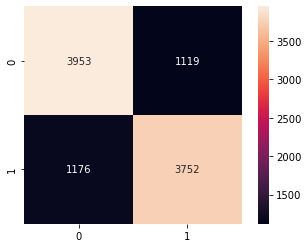

In [12]:
sns.heatmap(cm, annot=True, square=True, fmt='.0f');

In [13]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train2, y = y_train, cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.773 (+/- 0.012)


In [14]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [15]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
